# **Exploratory Data Analysis on Retail Sales Data**

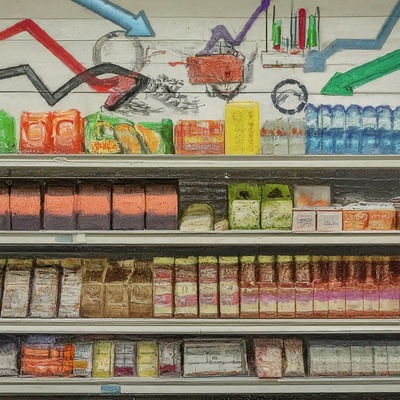

## **Author: Harshit Gahlaut**

- [LinkedIn](www.linkedin.com/in/harshitt-gahlaut)
- [GitHub](https://github.com/harshitgahlaut)
- [Kaggle](https://www.kaggle.com/harshitgahlaut)

## **Objective**:

The objective of this project is to perform an **Exploratory Data Analysis (EDA)** on a retail sales dataset to uncover key insights and trends. By analyzing various aspects of the dataset, such as sales performance across different months, regions, cities, and products, we aim to identify patterns that can inform business decisions.

**1) Importing Packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

**2) Importing Dataset**:

**2) Analysisng Data**:

In [2]:
# Loading the data into dataframe
retail_df = pd.read_csv('train.csv')

In [3]:
# Looking the data
retail_df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2607,2608,CA-2015-127446,25/11/2015,30/11/2015,Standard Class,MC-17590,Matt Collister,Corporate,United States,Arlington,Texas,76017.0,Central,TEC-AC-10001635,Technology,Accessories,KeyTronic KT400U2 - Keyboard - Black,24.672
3750,3751,CA-2018-161956,27/08/2018,29/08/2018,Second Class,DR-12880,Dan Reichenbach,Corporate,United States,Inglewood,California,90301.0,West,OFF-SU-10002503,Office Supplies,Supplies,Acme Preferred Stainless Steel Scissors,28.400
6486,6487,CA-2016-120621,21/03/2016,26/03/2016,Standard Class,JW-16075,Julia West,Consumer,United States,Jacksonville,North Carolina,28540.0,South,OFF-AP-10002945,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,962.080
2465,2466,CA-2018-148691,03/12/2018,09/12/2018,Standard Class,CS-12460,Chuck Sachs,Consumer,United States,New York City,New York,10009.0,East,OFF-LA-10001317,Office Supplies,Labels,Avery 520,3.150
2681,2682,CA-2018-127026,21/01/2018,27/01/2018,Standard Class,MH-18115,Mick Hernandez,Home Office,United States,Jackson,Michigan,49201.0,Central,OFF-BI-10001196,Office Supplies,Binders,"Avery Flip-Chart Easel Binder, Black",89.520


In [4]:
# Number of rows and columns
retail_df.shape

(9800, 18)

In [5]:
# Detailed info about Dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
# Convert Date columns to datetime
retail_df['Order Date'] = pd.to_datetime(retail_df['Order Date'], dayfirst=True )
retail_df['Ship Date'] = pd.to_datetime(retail_df['Ship Date'], dayfirst=True)


In [7]:
# Chaning the type of categorical columns to category
retail_df = retail_df.astype({"Ship Mode":'category', "Segment":'category',"Country":'category' ,
                              "City":'category',"State":'category',"Region":'category',"Category":'category',
                              "Sub-Category":'category',"Product Name":'category'})

In [8]:
# Statistical Summary
retail_df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9800.000000,9800,9800,9789.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55273.322403,230.769059
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.490000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,NaN,32041.223413,626.651875


In [9]:
# Checking for missing values
retail_df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [10]:
# Removing columns not necessaary for analysis
retail_df.drop(columns=['Postal Code','Row ID','Customer Name'],inplace=True)

In [11]:
# Checkig for duplicate values
retail_df.duplicated().sum()

1

In [12]:
# Removing duplicate values
retail_df.drop_duplicates(inplace=True)

## **Exploratory Data Analysis**

## **Univariate Analysis**

**How many unique customers are there?**

In [13]:
# Count unique customers
unique_customers = retail_df['Customer ID'].nunique()

print(f"There are {unique_customers} unique customers in the dataset")

There are 793 unique customers in the dataset


**What is the frequency distribution of ship modes?**

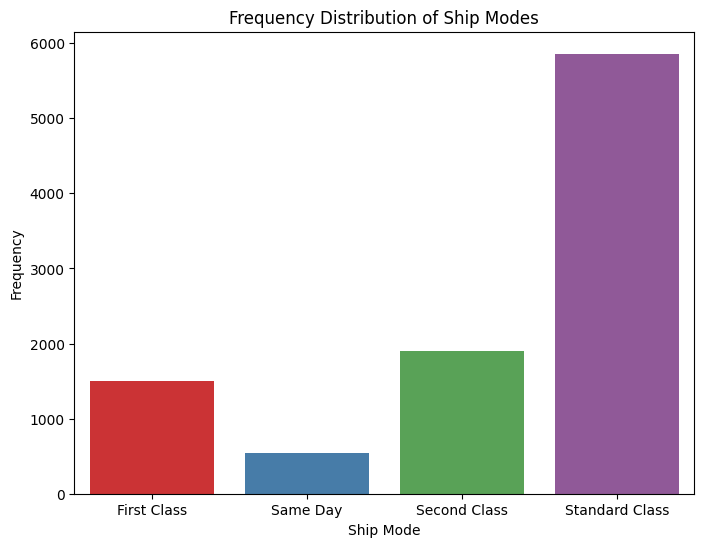

In [14]:
# Plot the frequency distribution of ship modes
plt.figure(figsize=(8, 6))
sns.countplot(x=retail_df['Ship Mode'])
sns.countplot(data=retail_df, x='Ship Mode', palette='Set1')
plt.title('Frequency Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')
plt.show()

**Plot the frequency distribution of segments**

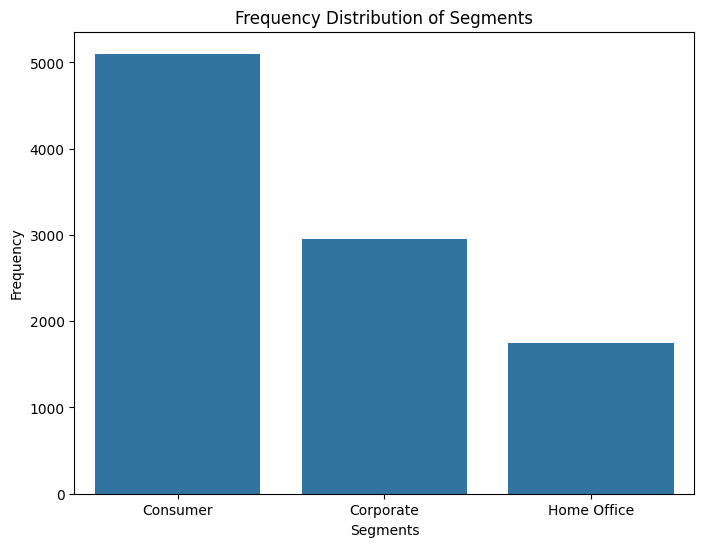

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x=retail_df['Segment'])
#sns.countplot(data=df, x='Ship Mode', palette='Set1')
plt.title('Frequency Distribution of Segments')
plt.xlabel('Segments')
plt.ylabel('Frequency')
plt.show()

**Number of Countries where products are sold**

In [16]:
unique_country = retail_df['Country'].nunique()

print(f"There are {unique_country} unique countries in the dataset")

There are 1 unique countries in the dataset


**What is the distribution of order dates?**

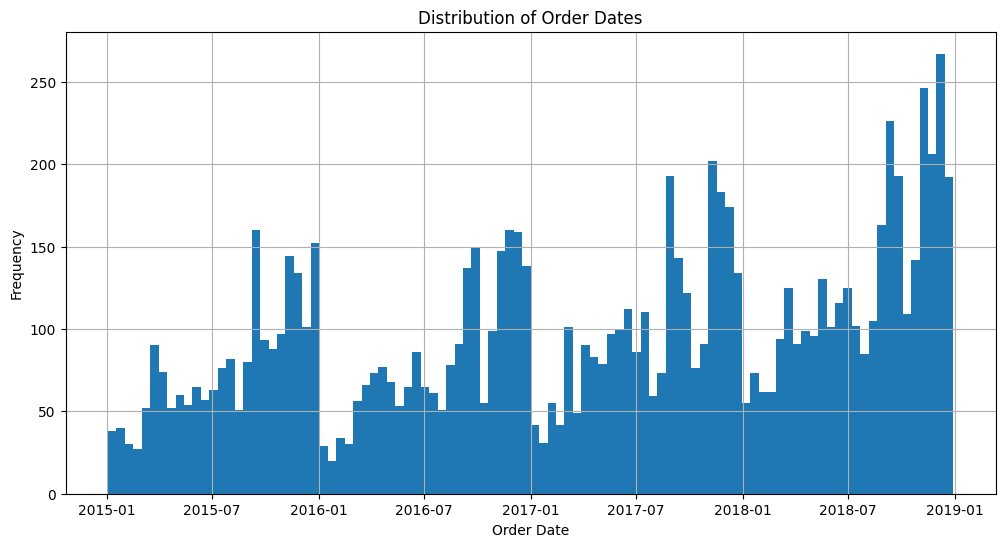

In [17]:
# Plot the distribution of order dates
plt.figure(figsize=(12, 6))
retail_df['Order Date'].hist(bins=100)
plt.title('Distribution of Order Dates')
plt.xlabel('Order Date')
plt.ylabel('Frequency')
plt.show()

**What is the distribution of regions?**

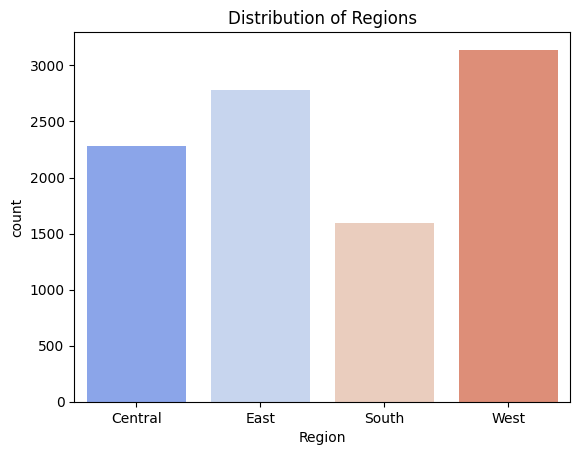

In [18]:
sns.countplot(data=retail_df, x='Region', palette='coolwarm')
plt.title("Distribution of Regions");

**Which product category has the most entries in the dataset?**

In [19]:
category_counts = retail_df['Category'].value_counts()

# Find the most frequent category
most_frequent_category = category_counts.idxmax()
most_frequent_category_count = category_counts.max()

print(f"The most frequent product category is {most_frequent_category} with {most_frequent_category_count} entries")

The most frequent product category is Office Supplies with 5909 entries


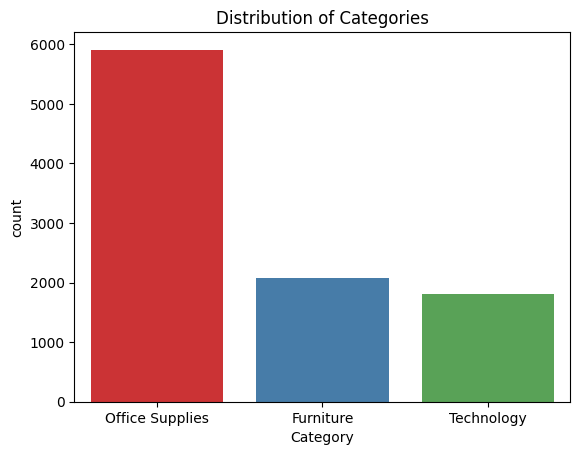

In [20]:
sns.countplot(data=retail_df, x='Category', palette='Set1', order= retail_df['Category'].value_counts().index)
plt.title("Distribution of Categories");

**List out the Sub Categories for prodducts**

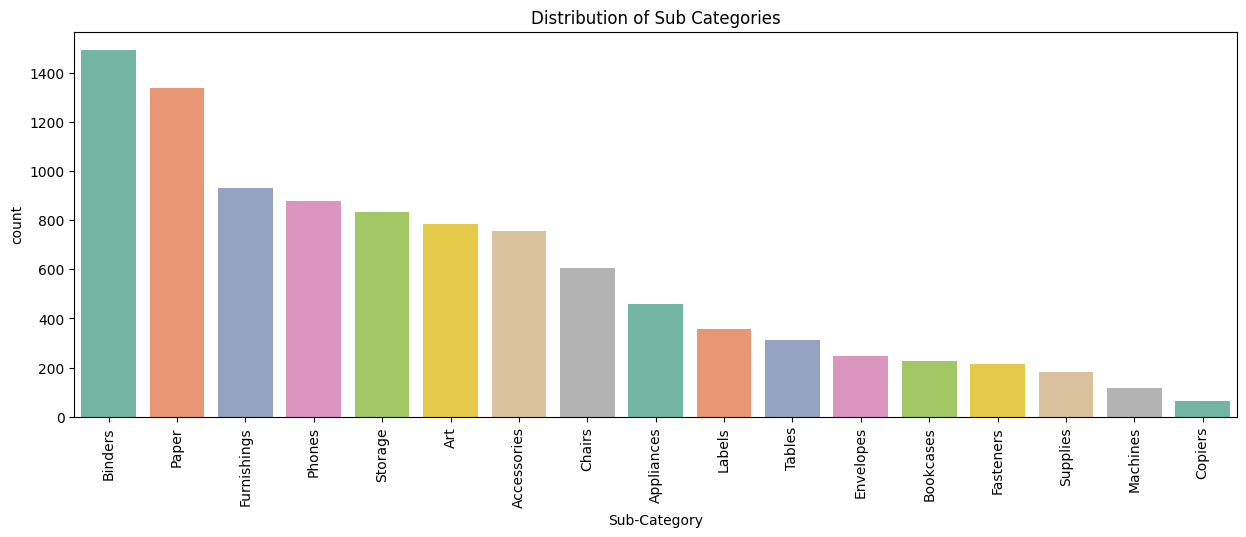

In [21]:
plt.figure(figsize = (15,5))
sns.countplot(data=retail_df, x='Sub-Category', palette='Set2',order= retail_df['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Sub Categories");

## **Bivariate Analysis**

**Which states have the highest revenue?**

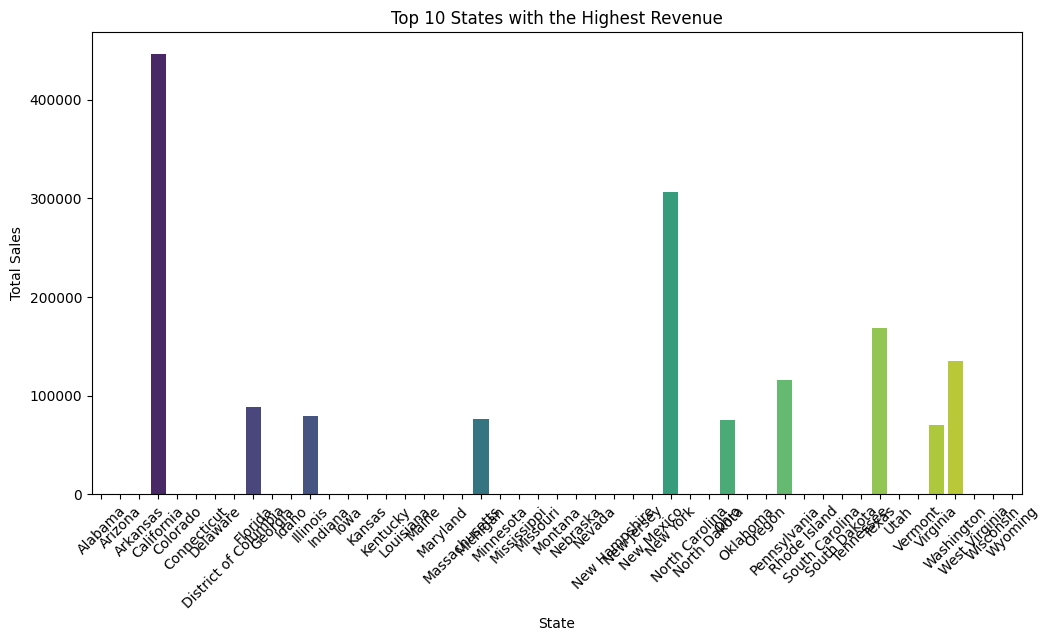

In [22]:
# Group by State and sum sales
state_sales = retail_df.groupby('State')['Sales'].sum()

# Get the top 10 states by sales
top_10_states = state_sales.nlargest(10)

# Plot the top 10 states by sales
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='viridis')
plt.title('Top 10 States with the Highest Revenue')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

**What is the relationship between ship mode and sales?**

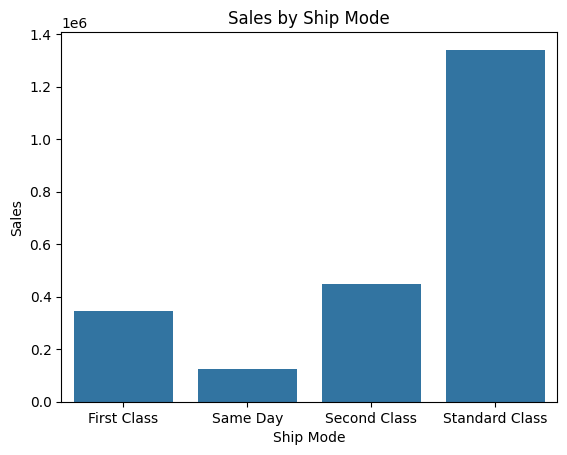

In [23]:
# Group by Ship Mode and sum sales
ship_mode_sales = retail_df.groupby('Ship Mode')['Sales'].sum().reset_index()

# Plot
sns.barplot(data=ship_mode_sales, x='Ship Mode', y='Sales')
plt.title('Sales by Ship Mode')
plt.show()

**Which customer segments generate the most revenue?**

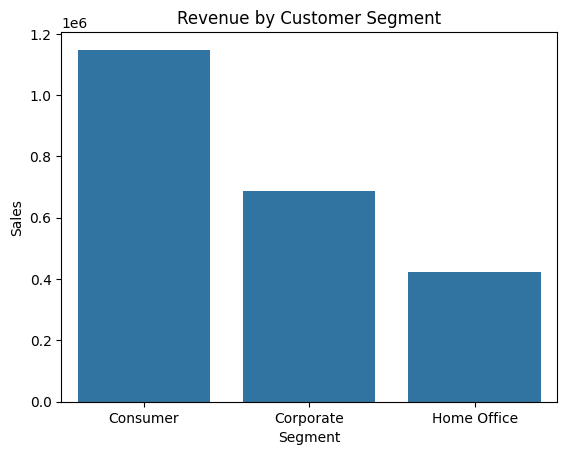

In [24]:
# Group by Segment and sum sales
segment_sales = retail_df.groupby('Segment')['Sales'].sum().reset_index()

# Plot
sns.barplot(data=segment_sales, x='Segment', y='Sales')
plt.title('Revenue by Customer Segment')
plt.show()

**How do sales vary across different regions?**

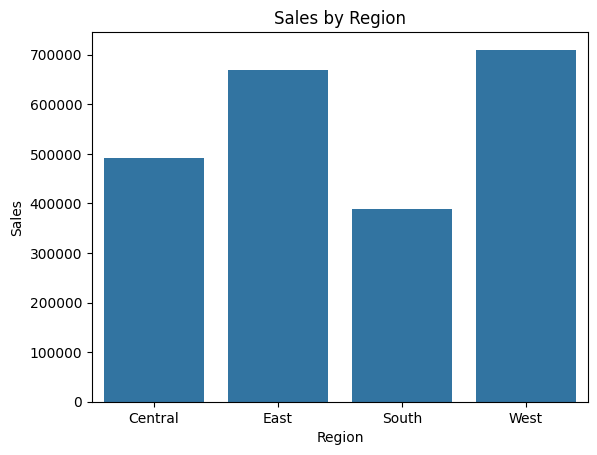

In [25]:
# Group by Region and sum sales
region_sales = retail_df.groupby('Region')['Sales'].sum().reset_index()

# Plot
sns.barplot(data=region_sales, x='Region', y='Sales')
plt.title('Sales by Region')
plt.show()

**Sales by Year**

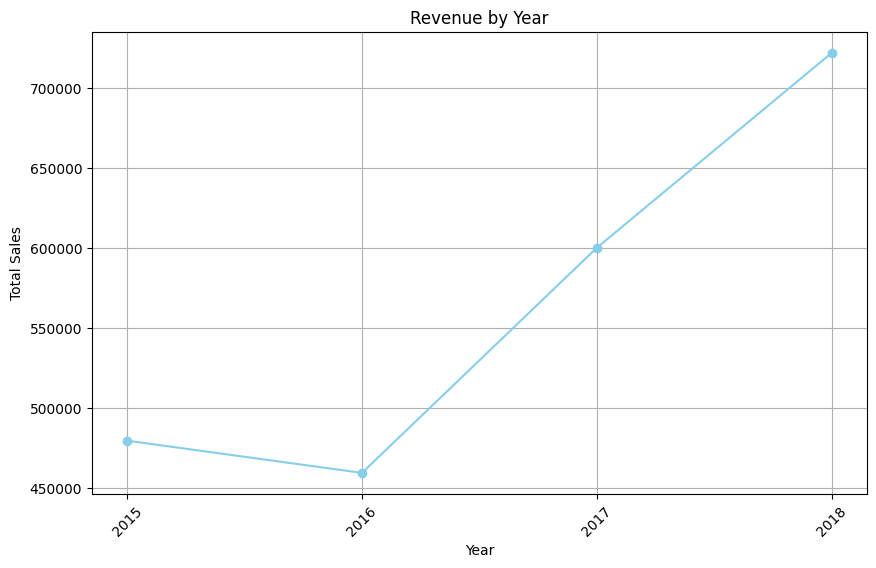

In [26]:
# Extract year from Order Date
retail_df['Year'] = retail_df['Order Date'].dt.year

# Group by Year and sum sales
yearly_sales = retail_df.groupby('Year')['Sales'].sum()

# Plot the yearly sales as a line plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-', color='skyblue')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(yearly_sales.index, rotation=45)
plt.grid(True)
plt.show()

**Sales by Month**

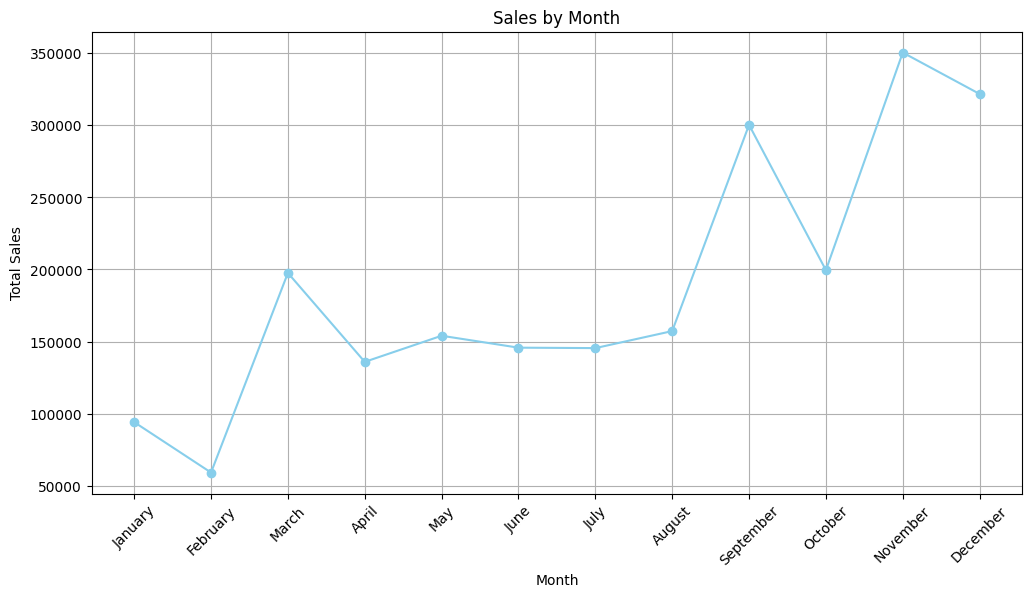

In [27]:
# Extract month from Order Date
retail_df['Month'] = retail_df['Order Date'].dt.strftime('%B')

# Define the order of months for sorting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group by Month and sum sales
monthly_sales = retail_df.groupby('Month')['Sales'].sum().reindex(months_order)

# Plot the monthly sales as a line plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='skyblue')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**What is the relationship between order date and sales?**

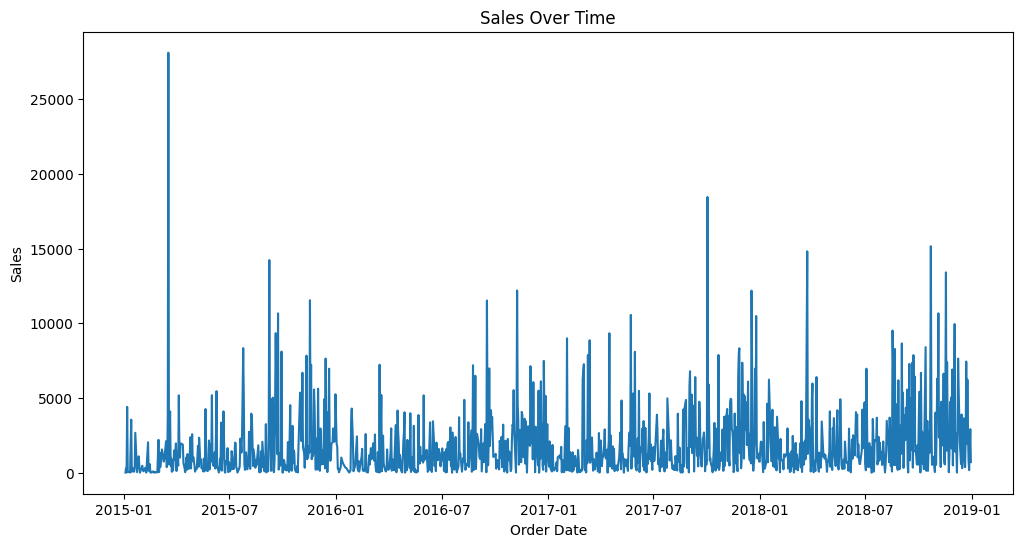

In [28]:
# Group by Order Date and sum sales
order_date_sales = retail_df.groupby('Order Date')['Sales'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=order_date_sales, x='Order Date', y='Sales')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.show()

## **Multivariate Analysis**

**How do sales vary by customer segment and category?**

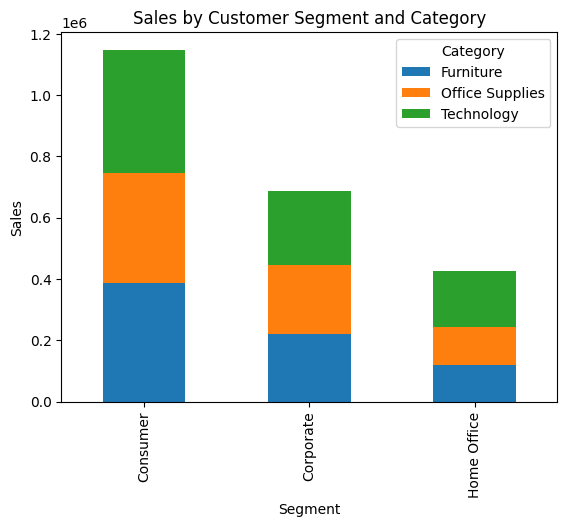

In [29]:
# Group by Segment and Category and sum sales
segment_category_sales = retail_df.groupby(['Segment', 'Category'])['Sales'].sum().unstack()

# Plot
segment_category_sales.plot(kind='bar', stacked=True)
plt.title('Sales by Customer Segment and Category')
plt.ylabel('Sales')
plt.show()

**How do sales vary by product category and region?**

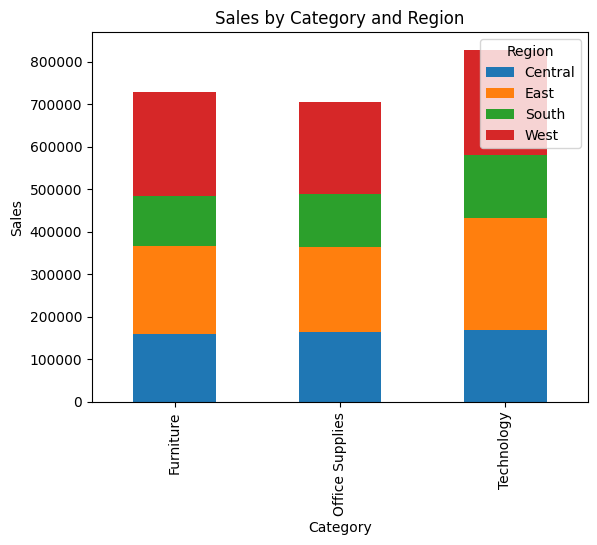

In [30]:
# Group by Category and Region and sum sales
category_region_sales = retail_df.groupby(['Category', 'Region'])['Sales'].sum().unstack()

# Plot
category_region_sales.plot(kind='bar', stacked=True)
plt.title('Sales by Category and Region')
plt.ylabel('Sales')
plt.show()

**What is the distribution of sales across different segments and ship modes?**

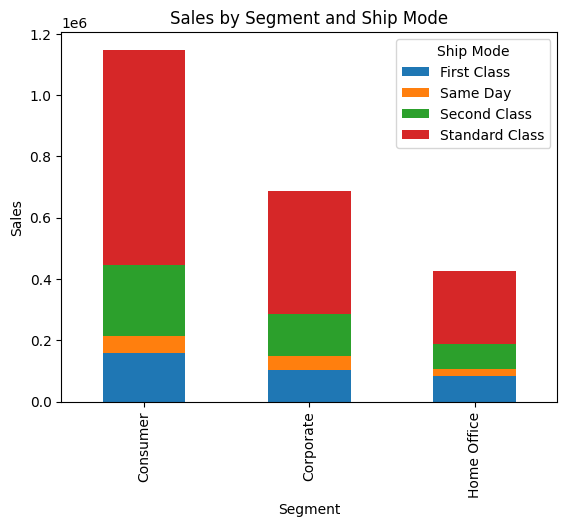

In [31]:
# Group by Segment and Ship Mode and sum sales
segment_ship_sales = retail_df.groupby(['Segment', 'Ship Mode'])['Sales'].sum().unstack()

# Plot
segment_ship_sales.plot(kind='bar', stacked=True)
plt.title('Sales by Segment and Ship Mode')
plt.ylabel('Sales')
plt.show()

**Are there any noticeable patterns in sales over time across different categories?**

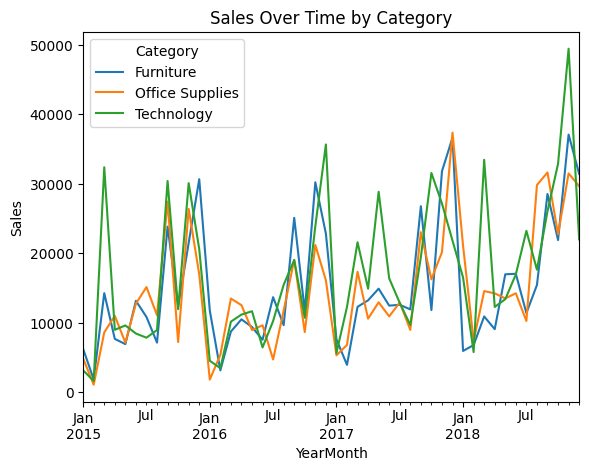

In [32]:
# Extract year and month from Order Date
retail_df['YearMonth'] = retail_df['Order Date'].dt.to_period('M')

# Group by YearMonth and Category and sum sales
time_category_sales = retail_df.groupby(['YearMonth', 'Category'])['Sales'].sum().unstack()

# Plot
time_category_sales.plot()
plt.title('Sales Over Time by Category')
plt.ylabel('Sales')
plt.show()

**How do sales and number of orders vary by month and region?**

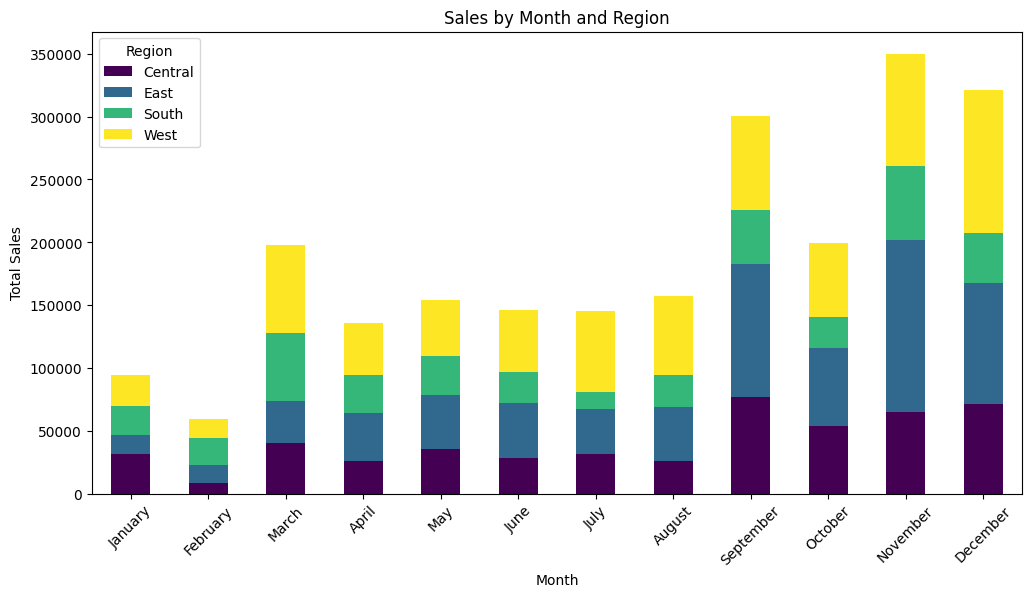

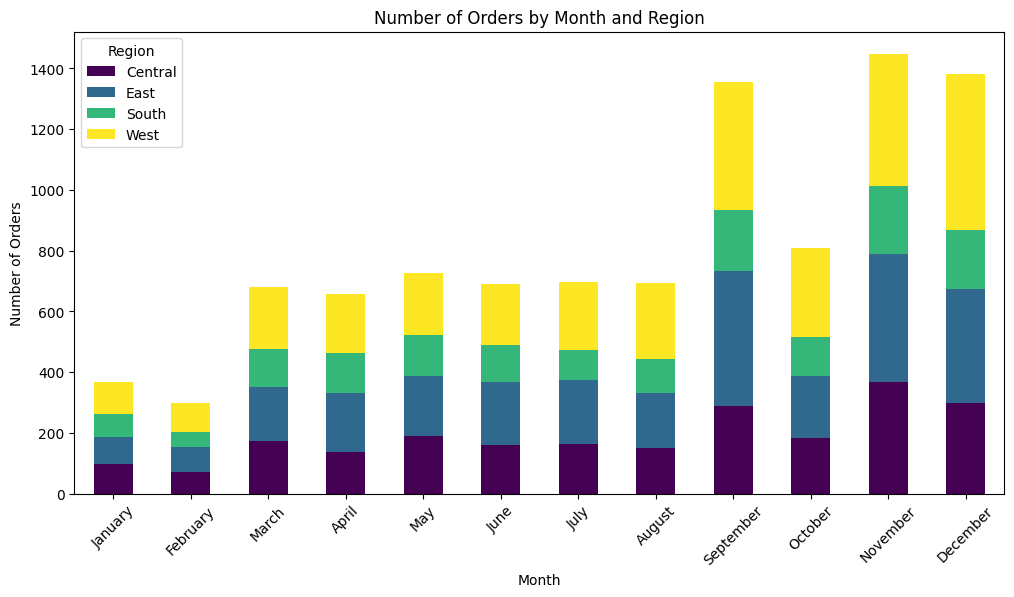

In [33]:
# Extract month name from Order Date
retail_df['Month'] = retail_df['Order Date'].dt.strftime('%B')

# Define the order of months for sorting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Group by Month and Region and sum sales and count orders
monthly_region_sales_orders = retail_df.groupby(['Month', 'Region']).agg({'Sales': 'sum', 'Order ID': 'count'}).unstack()

# Reindex the DataFrame to ensure the months are in the correct order
monthly_region_sales_orders = monthly_region_sales_orders.reindex(months_order, level=0)

# Plot total sales
monthly_region_sales_orders['Sales'].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Sales by Month and Region')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Plot number of orders
monthly_region_sales_orders['Order ID'].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Number of Orders by Month and Region')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

**What is the relationship between sales, category, and ship mode?**

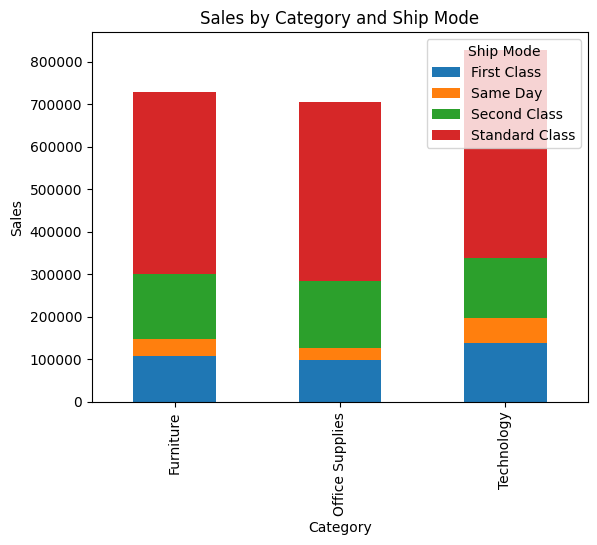

In [34]:
# Group by Category and Ship Mode and sum sales
category_ship_sales = retail_df.groupby(['Category', 'Ship Mode'])['Sales'].sum().unstack()

# Plot
category_ship_sales.plot(kind='bar', stacked=True)
plt.title('Sales by Category and Ship Mode')
plt.ylabel('Sales')
plt.show()